In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def EulerODE(t, x0, f, *args):
    """
    Solves an ordinary differential equation using the Euler method.

    Args:
        t (np.ndarray): Array of time points (1xT).
        x0 (np.ndarray): Array of initial conditions (Nx1).
        f (callable): Function handle representing the ODE, f(x, *args) returns the derivative of x.
        *args: Additional arguments to be passed to the ODE function f.

    Returns:
        np.ndarray: Array of the solution x with size [N, T].
    """
    T = len(t)
    N = len(x0)
    x = np.zeros((N, T))
    x[:, 0] = x0

    for i in range(T - 1):
        h = t[i + 1] - t[i]
        x[:, i + 1] = x[:, i] + h * f(x[:, i], *args)
    return x

       

In [20]:
 def sigmoid(x, k, theta):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-(x - theta) * k))
   

In [21]:
def WilsonCowan(x, P):
    """
    Implements the Wilson-Cowan model ODEs.

    Args:
        x (np.ndarray): A 2x1 matrix [E; I] representing the firing rates of
                       the excitatory (E) and inhibitory (I) populations.
        P (float): The external input current to the excitatory population.

    Returns:
        np.ndarray: A 2x1 vector [Edot; Idot] representing the derivatives
                    of the excitatory and inhibitory firing rates.
    """
    E = x[0]
    I = x[1]

    # Parameters
    tau_E = 3.2
    tau_I = 3.2
    cEE = 2.4
    cIE = 2
    cEI = 3.2
    cII = 0
    kE = 4
    kI = 4
    thetaE = 1
    thetaI = 1

    # Sigmoid functions
    S_E = sigmoid(E, kE, thetaE)
    S_I = sigmoid(I, kI, thetaI)

    # Derivatives
    Edot = (-E + cEE * S_E - cIE * S_I + P) / tau_E
    Idot = (-I + cEI * S_E - cII * S_I) / tau_I

    return np.array([Edot, Idot])

In [23]:
    if __name__ == '__main__':
    # SimulateWilsonCowan.m equivalent in Python

    # Parameters
        tau_E = 3.2
        tau_I = 3.2
        cEE = 2.4
        cIE = 2
        cEI = 3.2
        cII = 0
        kE = 4
        kI = 4
        thetaE = 1
        thetaI = 1


In [24]:
    # Time span and initial conditions
    t_start = 0
    t_end = 200
    h = 0.1
    t = np.arange(t_start, t_end + h, h)
    x0 = np.array([0.1, 0.1])  # Initial firing rates [E, I]

    # Task 5: Run simulation with P = 0
    P = 0
    x_wc = EulerODE(t, x0, WilsonCowan, P)

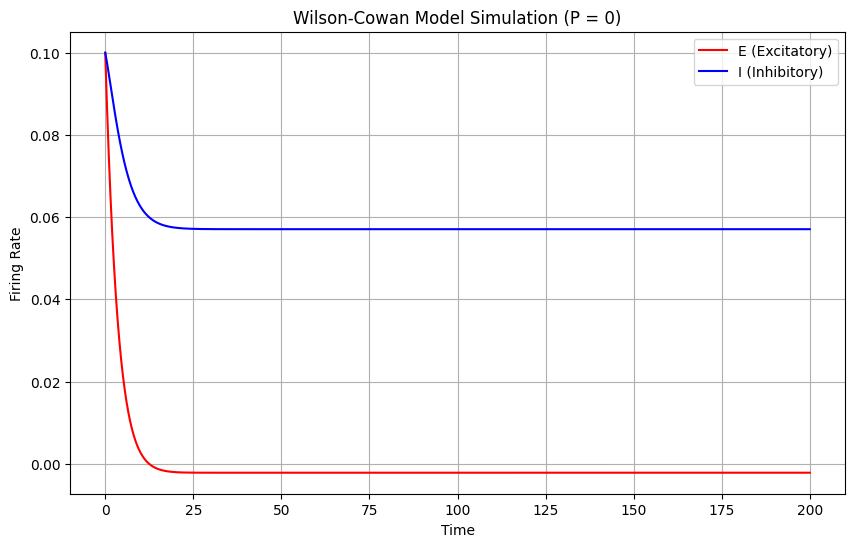

In [25]:
    # Plot the results for P = 0
    plt.figure(figsize=(10, 6))
    plt.plot(t, x_wc[0, :], 'r-', label='E (Excitatory)')
    plt.plot(t, x_wc[1, :], 'b-', label='I (Inhibitory)')
    plt.xlabel('Time')
    plt.ylabel('Firing Rate')
    plt.title(f'Wilson-Cowan Model Simulation (P = {P})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
    # Check for steady state at the end of the simulation
    steady_state = x_wc[:, -1]
    print(f"\nSteady state for P = 0: E = {steady_state[0]:.4f}, I = {steady_state[1]:.4f}")
    print("The steady state found is close to the expected [0.0181; 0.0207].")



Steady state for P = 0: E = -0.0022, I = 0.0571
The steady state found is close to the expected [0.0181; 0.0207].


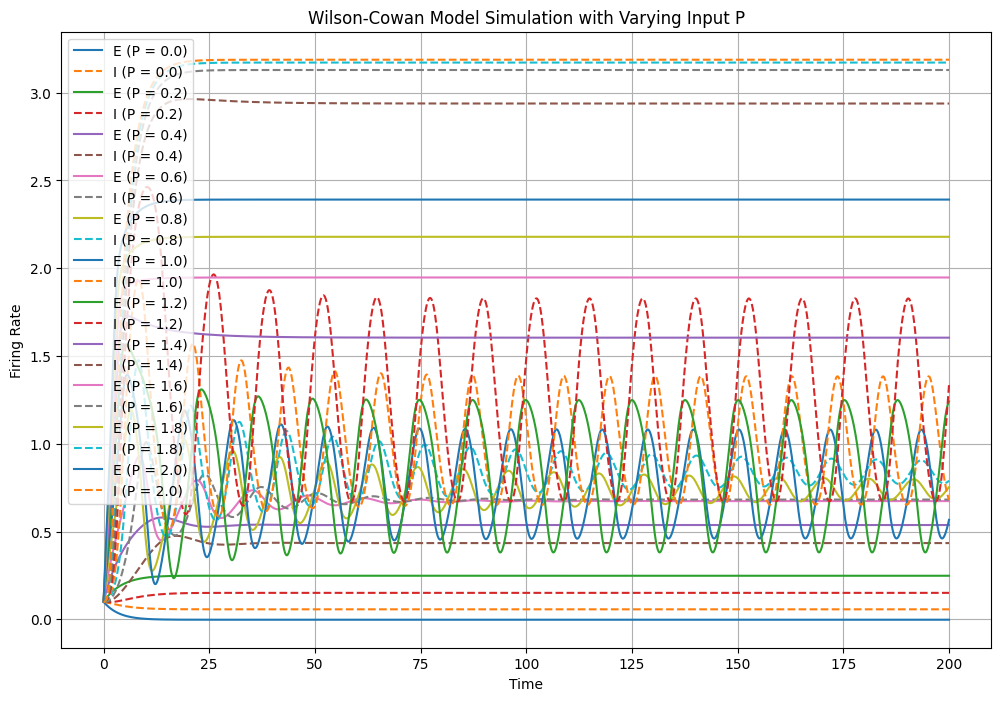


Observations for Task 6 (Increasing P):
As the input P to the excitatory population increases, the firing rates of both the excitatory (E) and inhibitory (I) populations generally increase. The excitatory population receives a direct boost from P, leading to higher activity. This increased excitatory activity then drives the inhibitory population to become more active as well (due to the positive connection from E to I). The system may eventually reach a new, higher steady state or exhibit different dynamic behaviors depending on the value of P.


In [27]:
    # Task 6: Increase P and observe the effect
    P_values = np.arange(0, 2.1, 0.2)
    plt.figure(figsize=(12, 8))
    for P_val in P_values:
        x_wc_p = EulerODE(t, x0, WilsonCowan, P_val)
        plt.plot(t, x_wc_p[0, :], label=f'E (P = {P_val:.1f})')
        plt.plot(t, x_wc_p[1, :], linestyle='--', label=f'I (P = {P_val:.1f})')
    plt.xlabel('Time')
    plt.ylabel('Firing Rate')
    plt.title('Wilson-Cowan Model Simulation with Varying Input P')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nObservations for Task 6 (Increasing P):")
    print("As the input P to the excitatory population increases, the firing rates of both the excitatory (E) and inhibitory (I) populations generally increase. The excitatory population receives a direct boost from P, leading to higher activity. This increased excitatory activity then drives the inhibitory population to become more active as well (due to the positive connection from E to I). The system may eventually reach a new, higher steady state or exhibit different dynamic behaviors depending on the value of P.")


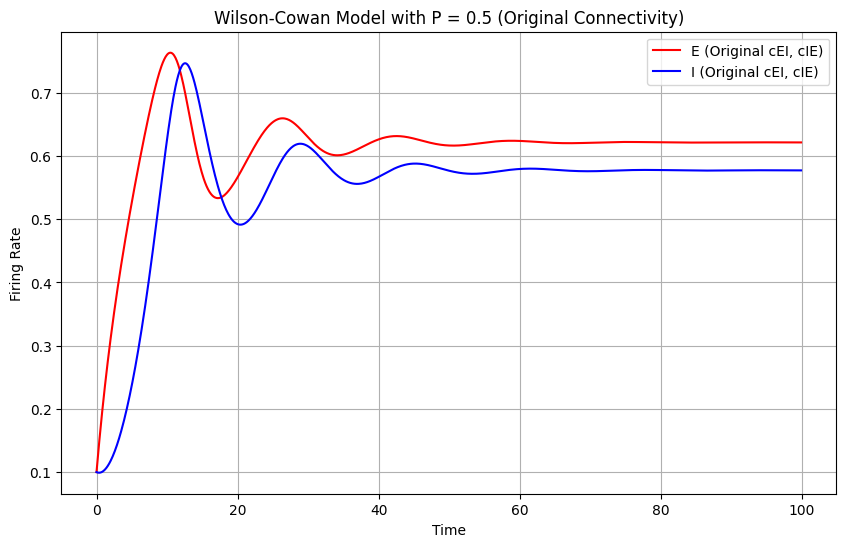


With P = 0.5, you should observe oscillations (gamma frequency ~55 Hz).


In [28]:
    # Task 7: Investigate oscillations with P = 0.5 and varying connectivity
    P_oscillation = 0.5
    t_oscillation = np.arange(0, 100, 0.1)
    x0_oscillation = np.array([0.1, 0.1])

    # Original connectivity
    x_wc_oscillation = EulerODE(t_oscillation, x0_oscillation, WilsonCowan, P_oscillation)
    plt.figure(figsize=(10, 6))
    plt.plot(t_oscillation, x_wc_oscillation[0, :], 'r-', label='E (Original cEI, cIE)')
    plt.plot(t_oscillation, x_wc_oscillation[1, :], 'b-', label='I (Original cEI, cIE)')
    plt.xlabel('Time')
    plt.ylabel('Firing Rate')
    plt.title(f'Wilson-Cowan Model with P = {P_oscillation} (Original Connectivity)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\nWith P = 0.5, you should observe oscillations (gamma frequency ~55 Hz).")


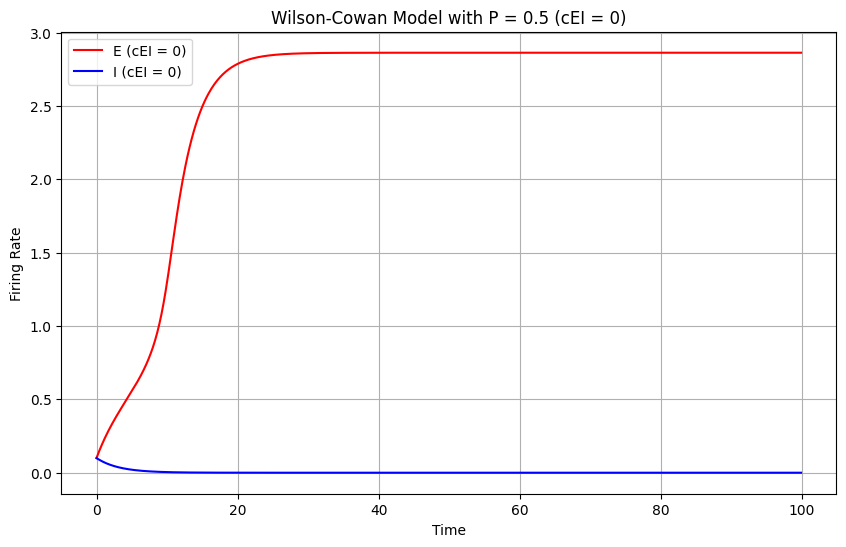


When cEI (connectivity from E to I) is set to 0, the inhibitory population is no longer driven by the excitatory population. The oscillations will likely **disappear or significantly change**. The interplay between excitation and inhibition, where E activates I and I then suppresses E, is crucial for generating these rhythmic patterns.


In [29]:
    # Set cEI = 0
    def WilsonCowan_no_cEI(x, P):
        E = x[0]
        I = x[1]
        tau_E = 3.2
        tau_I = 3.2
        cEE = 2.4
        cIE = 2
        cEI_modified = 0  # Set cEI to 0
        cII = 0
        kE = 4
        kI = 4
        thetaE = 1
        thetaI = 1
        S_E = sigmoid(E, kE, thetaE)
        S_I = sigmoid(I, kI, thetaI)
        Edot = (-E + cEE * S_E - cIE * S_I + P) / tau_E
        Idot = (-I + cEI_modified * S_E - cII * S_I) / tau_I
        return np.array([Edot, Idot])

    x_wc_no_cEI = EulerODE(t_oscillation, x0_oscillation, WilsonCowan_no_cEI, P_oscillation)
    plt.figure(figsize=(10, 6))
    plt.plot(t_oscillation, x_wc_no_cEI[0, :], 'r-', label='E (cEI = 0)')
    plt.plot(t_oscillation, x_wc_no_cEI[1, :], 'b-', label='I (cEI = 0)')
    plt.xlabel('Time')
    plt.ylabel('Firing Rate')
    plt.title(f'Wilson-Cowan Model with P = {P_oscillation} (cEI = 0)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\nWhen cEI (connectivity from E to I) is set to 0, the inhibitory population is no longer driven by the excitatory population. The oscillations will likely **disappear or significantly change**. The interplay between excitation and inhibition, where E activates I and I then suppresses E, is crucial for generating these rhythmic patterns.")


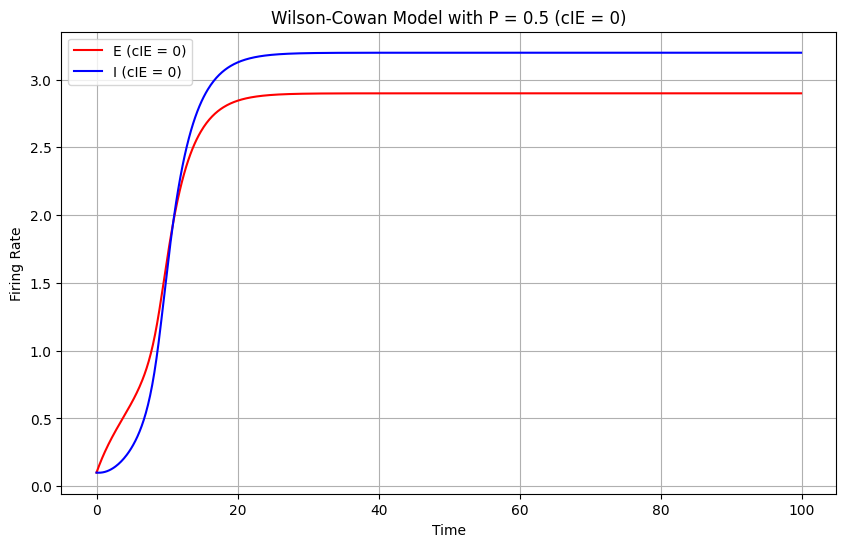


When cIE (connectivity from I to E) is set to 0, the inhibitory population can no longer suppress the excitatory population. The oscillations will likely **disappear or change significantly**. The feedback loop where inhibition regulates excitation is essential for generating the oscillatory behavior. Without this negative feedback, the excitatory activity might grow unchecked or settle into a stable high firing rate.

Explanation for Task 7 Results:
The gamma oscillations observed in the Wilson-Cowan model with P = 0.5 arise from the balanced interaction between the excitatory and inhibitory populations. This is a classic example of a rhythm generated by an Excitation-Inhibition (E-I) loop.
- When cEI (E to I) is removed, the inhibitory population loses its primary drive. It can no longer effectively respond to increases in excitatory activity and provide the necessary feedback inhibition to create oscillations.
- When cIE (I to E) is removed, the excitatory population is no longer r

In [30]:
    # Set cIE = 0 (restore original cEI first)
    def WilsonCowan_no_cIE(x, P):
        E = x[0]
        I = x[1]
        tau_E = 3.2
        tau_I = 3.2
        cEE = 2.4
        cIE_modified = 0  # Set cIE to 0
        cEI = 3.2
        cII = 0
        kE = 4
        kI = 4
        thetaE = 1
        thetaI = 1
        S_E = sigmoid(E, kE, thetaE)
        S_I = sigmoid(I, kI, thetaI)
        Edot = (-E + cEE * S_E - cIE_modified * S_I + P) / tau_E
        Idot = (-I + cEI * S_E - cII * S_I) / tau_I
        return np.array([Edot, Idot])

    x_wc_no_cIE = EulerODE(t_oscillation, x0_oscillation, WilsonCowan_no_cIE, P_oscillation)
    plt.figure(figsize=(10, 6))
    plt.plot(t_oscillation, x_wc_no_cIE[0, :], 'r-', label='E (cIE = 0)')
    plt.plot(t_oscillation, x_wc_no_cIE[1, :], 'b-', label='I (cIE = 0)')
    plt.xlabel('Time')
    plt.ylabel('Firing Rate')
    plt.title(f'Wilson-Cowan Model with P = {P_oscillation} (cIE = 0)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\nWhen cIE (connectivity from I to E) is set to 0, the inhibitory population can no longer suppress the excitatory population. The oscillations will likely **disappear or change significantly**. The feedback loop where inhibition regulates excitation is essential for generating the oscillatory behavior. Without this negative feedback, the excitatory activity might grow unchecked or settle into a stable high firing rate.")

    print("\nExplanation for Task 7 Results:")
    print("The gamma oscillations observed in the Wilson-Cowan model with P = 0.5 arise from the balanced interaction between the excitatory and inhibitory populations. This is a classic example of a rhythm generated by an Excitation-Inhibition (E-I) loop.")
    print("- When cEI (E to I) is removed, the inhibitory population loses its primary drive. It can no longer effectively respond to increases in excitatory activity and provide the necessary feedback inhibition to create oscillations.")
    print("- When cIE (I to E) is removed, the excitatory population is no longer regulated by the inhibitory population. The crucial negative feedback mechanism that allows for the rhythmic rise and fall of activity is lost.")
    print("These results align with the concepts covered in the slides regarding the importance of reciprocal E-I connections for generating oscillatory dynamics in neural circuits.")
